In [1]:
!pip install findspark


In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = (SparkSession.builder
    .appName("NYC Taxi EDA")
    .master("local[*]")
    .config("spark.hadoop.fs.defaultFS", "hdfs://namenode:9000")
    .config("spark.driver.memory", "16g")
    .getOrCreate()
)

print(" New SparkSession started!")


 New SparkSession started!


In [2]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = (SparkSession.builder 
    .appName("NYC Taxi EDA") 
    .master("local[*]") 
    .config("spark.hadoop.fs.defaultFS", "hdfs://namenode:9000") 
    .getOrCreate()
        )
df = spark.read.parquet("hdfs://namenode:9000/input/")

print(f"✅ Data loaded: {df.count()} rows")# we have the added green tickk symbol from special keyboard beacause our spark connection  was geeting disconnected many times while doing this project so we had to run each cell again and again for many times.This took a lot of time ,to save time if this tick appears at the end of cell we went to the next cell without the necessity of checking the output each time.This symbol is used in cells wherever we faced the message 'connection lost'
df.show(5)


✅ Data loaded: 218118168 rows
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       1| 2019-03-01 00:24:41|  2019-03-01 00:25:31|            1.0|          0.0|       1.0|                 N|         145|         145|           2|     

✅ Data loaded from HDFS! Total Rows: 218118168
root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: integer (nullable = true)


🔵 Showing 5 rows:
+--------+--------------------+---------------------+----------

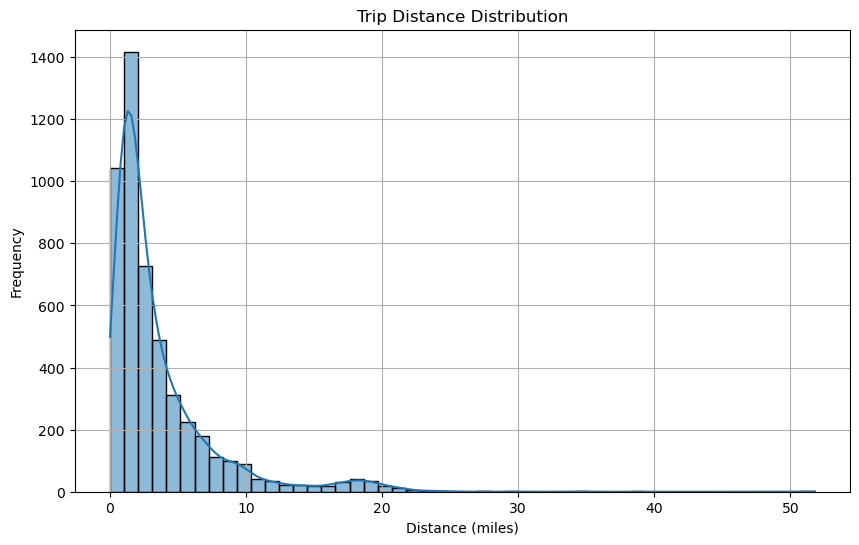

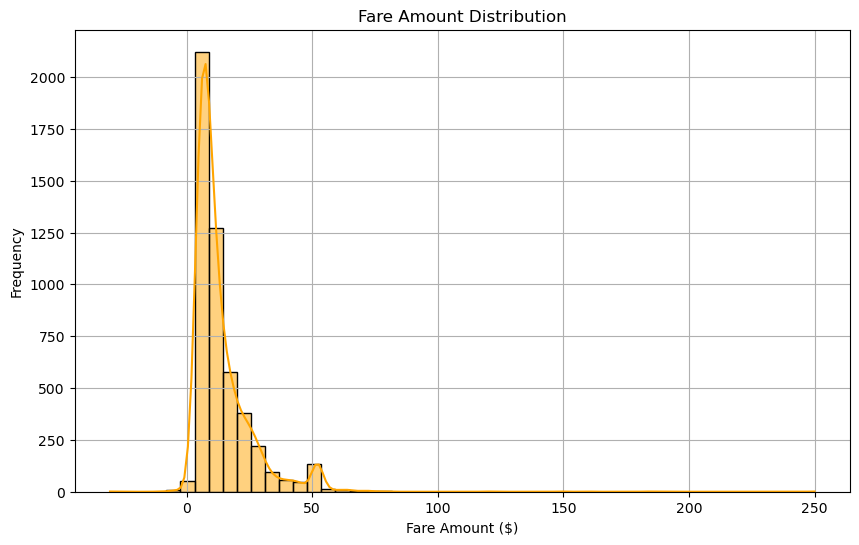

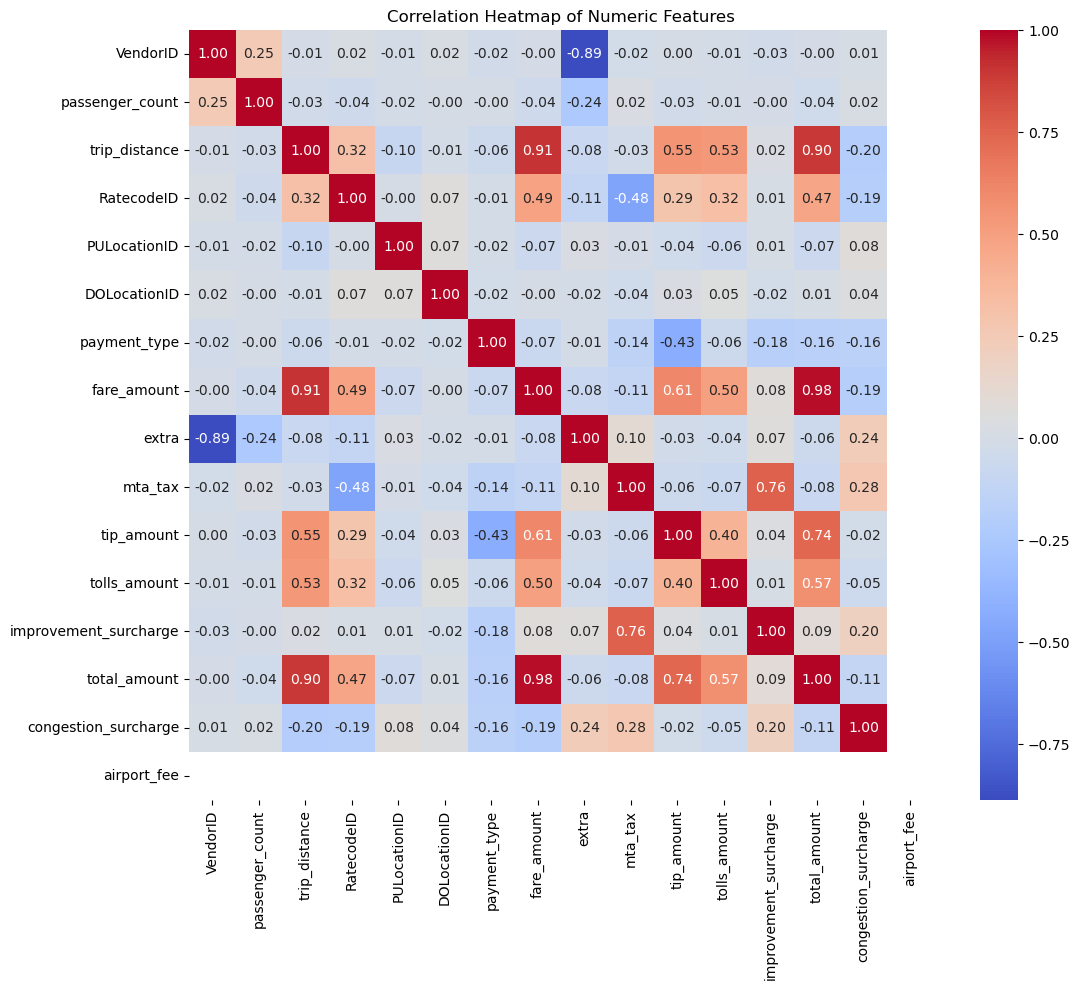

In [4]:
df = spark.read.parquet("hdfs://namenode:9000/input/")
print(f"✅ Data loaded from HDFS! Total Rows: {df.count()}")
df.printSchema()
print("\n🔵 Showing 5 rows:")
df.show(5, truncate=False)
print("\n🔵 Converting a small sample to Pandas for visualization...")
sample_pdf = df.limit(5000).toPandas()
print(f"✅ Sample DataFrame created! Shape: {sample_pdf.shape}")
import matplotlib.pyplot as plt
import seaborn as sns
if 'trip_distance' in sample_pdf.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(sample_pdf['trip_distance'], bins=50, kde=True)
    plt.title('Trip Distance Distribution')
    plt.xlabel('Distance (miles)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("⚠️ Column 'trip_distance' not found.")
if 'fare_amount' in sample_pdf.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(sample_pdf['fare_amount'], bins=50, kde=True, color="orange")
    plt.title('Fare Amount Distribution')
    plt.xlabel('Fare Amount ($)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("⚠️ Column 'fare_amount' not found.")
numeric_cols = sample_pdf.select_dtypes(include=['int64', 'float64']).columns.tolist()
if len(numeric_cols) >= 2:
    plt.figure(figsize=(12,10))
    corr = sample_pdf[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Features")
    plt.show()
else:
    print(" Not enough numeric columns for correlation heatmap.")

In [5]:
from pyspark.sql import functions as F
from pyspark.sql.types import NumericType
sample_df = df.limit(200000)  
print(f"Sample created with {sample_df.count()} rows.")
numeric_cols = [field.name for field in sample_df.schema.fields if isinstance(field.dataType, NumericType)]

print(f" Numeric columns: {numeric_cols}")
agg_exprs = []
for col in numeric_cols:
    agg_exprs.extend([
        F.count(col).alias(f"{col}_count"),
        F.mean(col).alias(f"{col}_mean"),
        F.stddev(col).alias(f"{col}_stddev"),
        F.min(col).alias(f"{col}_min"),
        F.max(col).alias(f"{col}_max")
    ])
print("\n📊 Collecting summary results safely...")
summary_result = sample_df.collect()
print("\n✅ Showing first 5 summary rows:")
for row in summary_result[:5]:   
    print(row.asDict())

Sample created with 200000 rows.
 Numeric columns: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

📊 Collecting summary results safely...

✅ Showing first 5 summary rows:
{'VendorID': 1, 'tpep_pickup_datetime': datetime.datetime(2019, 3, 1, 0, 24, 41), 'tpep_dropoff_datetime': datetime.datetime(2019, 3, 1, 0, 25, 31), 'passenger_count': 1.0, 'trip_distance': 0.0, 'RatecodeID': 1.0, 'store_and_fwd_flag': 'N', 'PULocationID': 145, 'DOLocationID': 145, 'payment_type': 2, 'fare_amount': 2.5, 'extra': 0.5, 'mta_tax': 0.5, 'tip_amount': 0.0, 'tolls_amount': 0.0, 'improvement_surcharge': 0.3, 'total_amount': 3.8, 'congestion_surcharge': 0.0, 'airport_fee': None}
{'VendorID': 1, 'tpep_pickup_datetime': datetime.datetime(2019, 3, 1, 0, 25, 27), 'tpep_dropoff_datetime': datetime.datetime(20

/tmp/ipykernel_16294/2177909798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='passenger_count', data=sample_pdf, palette='viridis')


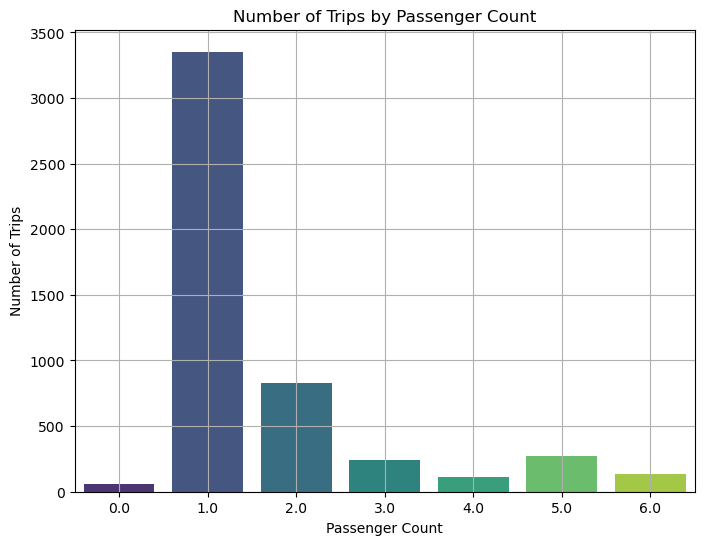

In [6]:
if 'passenger_count' in sample_pdf.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x='passenger_count', data=sample_pdf, palette='viridis')
    plt.title('Number of Trips by Passenger Count')
    plt.xlabel('Passenger Count')
    plt.ylabel('Number of Trips')
    plt.grid(True)
    plt.show()
else:
    print("Column 'passenger_count' not found.")

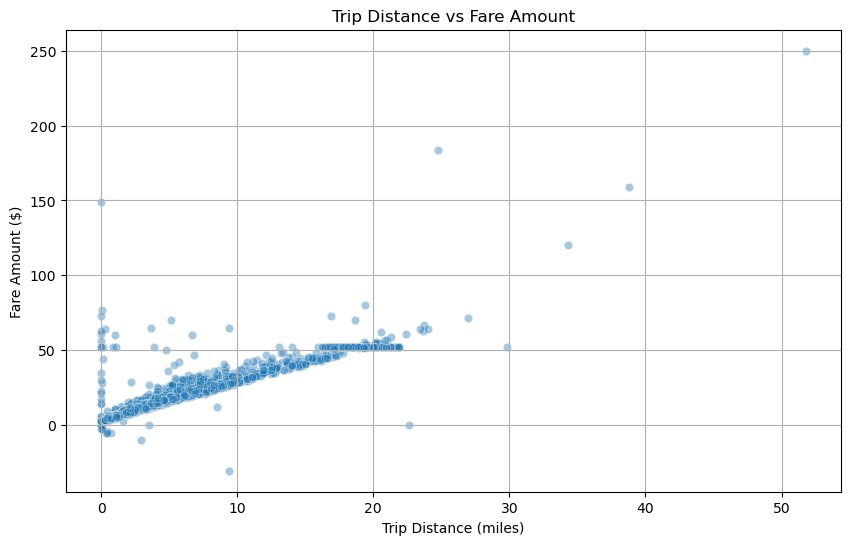

In [7]:
if 'trip_distance' in sample_pdf.columns and 'fare_amount' in sample_pdf.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='trip_distance', y='fare_amount', data=sample_pdf, alpha=0.4)
    plt.title('Trip Distance vs Fare Amount')
    plt.xlabel('Trip Distance (miles)')
    plt.ylabel('Fare Amount ($)')
    plt.grid(True)
    plt.show()
else:
    print("⚠️ Columns not found.")

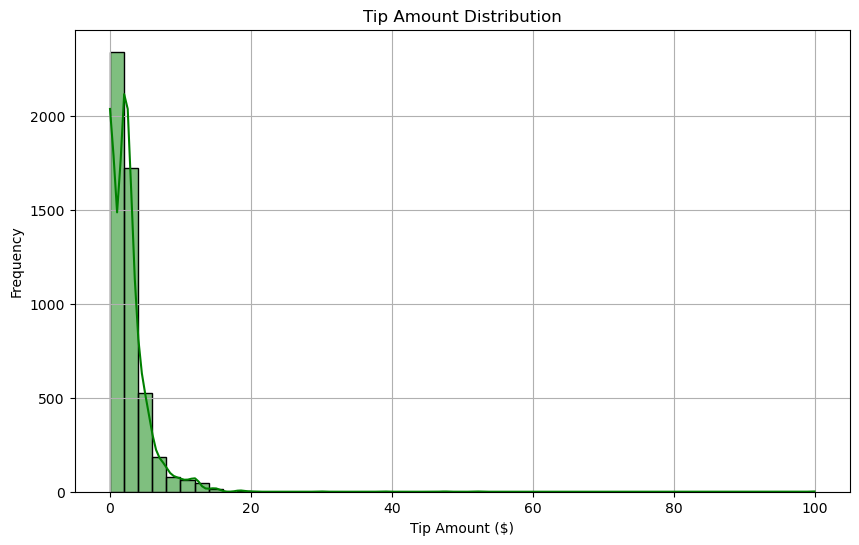

In [8]:
if 'tip_amount' in sample_pdf.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(sample_pdf['tip_amount'], bins=50, kde=True, color="green")
    plt.title('Tip Amount Distribution')
    plt.xlabel('Tip Amount ($)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("⚠️ Column 'tip_amount' not found.")

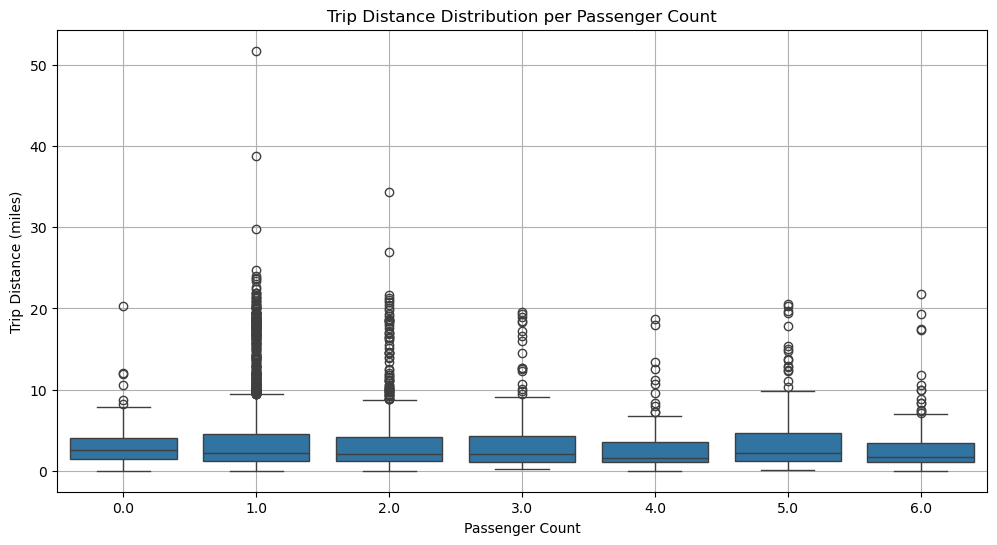

In [10]:
if 'trip_distance' in sample_pdf.columns and 'passenger_count' in sample_pdf.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='passenger_count', y='trip_distance', data=sample_pdf)
    plt.title('Trip Distance Distribution per Passenger Count')
    plt.xlabel('Passenger Count')
    plt.ylabel('Trip Distance (miles)')
    plt.grid(True)
    plt.show()
else:
    print("⚠️ Columns not found.")

In [3]:
import subprocess
input_path = "hdfs://namenode:9000/input/"
def list_hdfs_files(hdfs_path):
    cmd = ["hdfs", "dfs", "-ls", hdfs_path]
    result = subprocess.run(cmd, capture_output=True, text=True)
    files = []
    for line in result.stdout.split("\n"):
        parts = line.split()
        if len(parts) == 8:  # Typical HDFS ls line format
            file_path = parts[-1]
            if file_path.endswith(".parquet"):
                files.append(file_path)
    return files

all_files = list_hdfs_files(input_path)
print(f"✅ Found {len(all_files)} parquet files.")

✅ Found 60 parquet files.


In [4]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.types import DoubleType, IntegerType
import subprocess
spark = SparkSession.builder.appName("DIC_Full_Load_Clean").getOrCreate()
def list_hdfs_files(hdfs_path):
    cmd = ["hdfs", "dfs", "-ls", hdfs_path]
    result = subprocess.run(cmd, capture_output=True, text=True)
    files = []
    for line in result.stdout.split("\n"):
        parts = line.split()
        if len(parts) == 8:
            file_path = parts[-1]
            if file_path.endswith(".parquet"):
                files.append(file_path)
    return files
input_path = "hdfs://namenode:9000/input/"
all_files = list_hdfs_files(input_path)
print(f"✅ Found {len(all_files)} parquet files.")
def load_and_fix(path):
    df = spark.read.option("parquet.enable.vectorized.reader", "false").parquet(path)
    # Fix columns
    if 'VendorID' in df.columns:
        df = df.withColumn("VendorID", F.col("VendorID").cast(IntegerType()))
    if 'airport_fee' in df.columns:
        df = df.withColumn("airport_fee", F.col("airport_fee").cast(DoubleType()))
    return df
full_df = None
for path in all_files:
    temp_df = load_and_fix(path)
    if full_df is None:
        full_df = temp_df
    else:
        full_df = full_df.unionByName(temp_df)
print(f"✅ Successfully loaded {full_df.count()} rows.")
full_df.printSchema()

✅ Found 60 parquet files.
✅ Successfully loaded 218118168 rows.
root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)



In [5]:
print("\n Missing Values Report:")
for col_name in full_df.columns:
    dtype = dict(full_df.dtypes)[col_name]
    if dtype in ['double', 'float']:
        missing_count = full_df.filter(F.col(col_name).isNull() | F.isnan(col_name)).count()
    else:
        missing_count = full_df.filter(F.col(col_name).isNull()).count()
    
    print(f" Missing values in '{col_name}': {missing_count}")


 Missing Values Report:
 Missing values in 'VendorID': 0
 Missing values in 'tpep_pickup_datetime': 0
 Missing values in 'tpep_dropoff_datetime': 0
 Missing values in 'passenger_count': 5410704
 Missing values in 'trip_distance': 0
 Missing values in 'RatecodeID': 5410704
 Missing values in 'store_and_fwd_flag': 5410704
 Missing values in 'PULocationID': 0
 Missing values in 'DOLocationID': 0
 Missing values in 'payment_type': 0
 Missing values in 'fare_amount': 0
 Missing values in 'extra': 0
 Missing values in 'mta_tax': 0
 Missing values in 'tip_amount': 0
 Missing values in 'tolls_amount': 0
 Missing values in 'improvement_surcharge': 0
 Missing values in 'total_amount': 0
 Missing values in 'congestion_surcharge': 10266922
 Missing values in 'airport_fee': 117566592


In [5]:
from pyspark.sql import functions as F
print("\ FINAL Missing Value Handling Strategy...")
cleaned_df = full_df.fillna({"passenger_count": 1})
ratecode_mode = cleaned_df.groupBy("RatecodeID").count().orderBy(F.desc("count")).first()["RatecodeID"]
cleaned_df = cleaned_df.fillna({"RatecodeID": ratecode_mode})
store_flag_mode = cleaned_df.groupBy("store_and_fwd_flag").count().orderBy(F.desc("count")).first()["store_and_fwd_flag"]
cleaned_df = cleaned_df.fillna({"store_and_fwd_flag": store_flag_mode})
congestion_mean = cleaned_df.select(F.mean("congestion_surcharge")).first()[0]
cleaned_df = cleaned_df.fillna({"congestion_surcharge": congestion_mean})
airport_fee_mean = cleaned_df.select(F.mean("airport_fee")).first()[0]
cleaned_df = cleaned_df.fillna({"airport_fee": airport_fee_mean})
print("\n After Filling, Missing Values per Column:")
for col in cleaned_df.columns:
    missing = cleaned_df.filter(F.col(col).isNull()).count()
    print(f"Missing in '{col}': {missing}")

\ FINAL Missing Value Handling Strategy...

 After Filling, Missing Values per Column:
Missing in 'VendorID': 0
Missing in 'tpep_pickup_datetime': 0
Missing in 'tpep_dropoff_datetime': 0
Missing in 'passenger_count': 0
Missing in 'trip_distance': 0
Missing in 'RatecodeID': 0
Missing in 'store_and_fwd_flag': 0
Missing in 'PULocationID': 0
Missing in 'DOLocationID': 0
Missing in 'payment_type': 0
Missing in 'fare_amount': 0
Missing in 'extra': 0
Missing in 'mta_tax': 0
Missing in 'tip_amount': 0
Missing in 'tolls_amount': 0
Missing in 'improvement_surcharge': 0
Missing in 'total_amount': 0
Missing in 'congestion_surcharge': 0
Missing in 'airport_fee': 0


In [6]:
from pyspark.sql.types import *
correct_types = {
    "VendorID": LongType(),
    "tpep_pickup_datetime": TimestampType(),
    "tpep_dropoff_datetime": TimestampType(),
    "passenger_count": DoubleType(),
    "trip_distance": DoubleType(),
    "RatecodeID": DoubleType(),
    "store_and_fwd_flag": StringType(),
    "PULocationID": LongType(),
    "DOLocationID": LongType(),
    "payment_type": LongType(),
    "fare_amount": DoubleType(),
    "extra": DoubleType(),
    "mta_tax": DoubleType(),
    "tip_amount": DoubleType(),
    "tolls_amount": DoubleType(),
    "improvement_surcharge": DoubleType(),
    "total_amount": DoubleType(),
    "congestion_surcharge": DoubleType(),
    "airport_fee": DoubleType()
}
df = cleaned_df
for col_name, data_type in correct_types.items():
    if col_name in df.columns:
        df = df.withColumn(col_name, F.col(col_name).cast(data_type))
print("\n Schema after Data Type Conversion:")
df.printSchema()
print("\n Sample Data:")
df.show(5, truncate=False)


 Schema after Data Type Conversion:
root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = false)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = false)
 |-- store_and_fwd_flag: string (nullable = false)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = false)
 |-- airport_fee: double (nullable = false)


 Sample Data:
+--------+--------------------+---------------------+---------------+------------

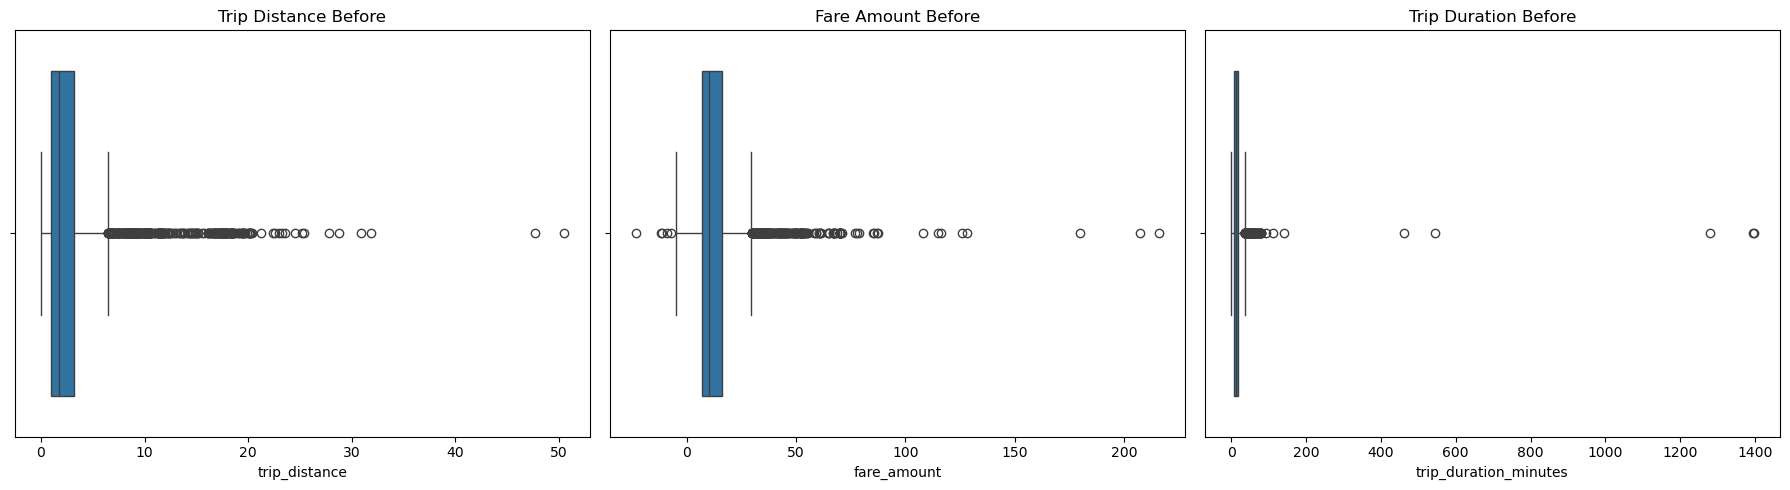

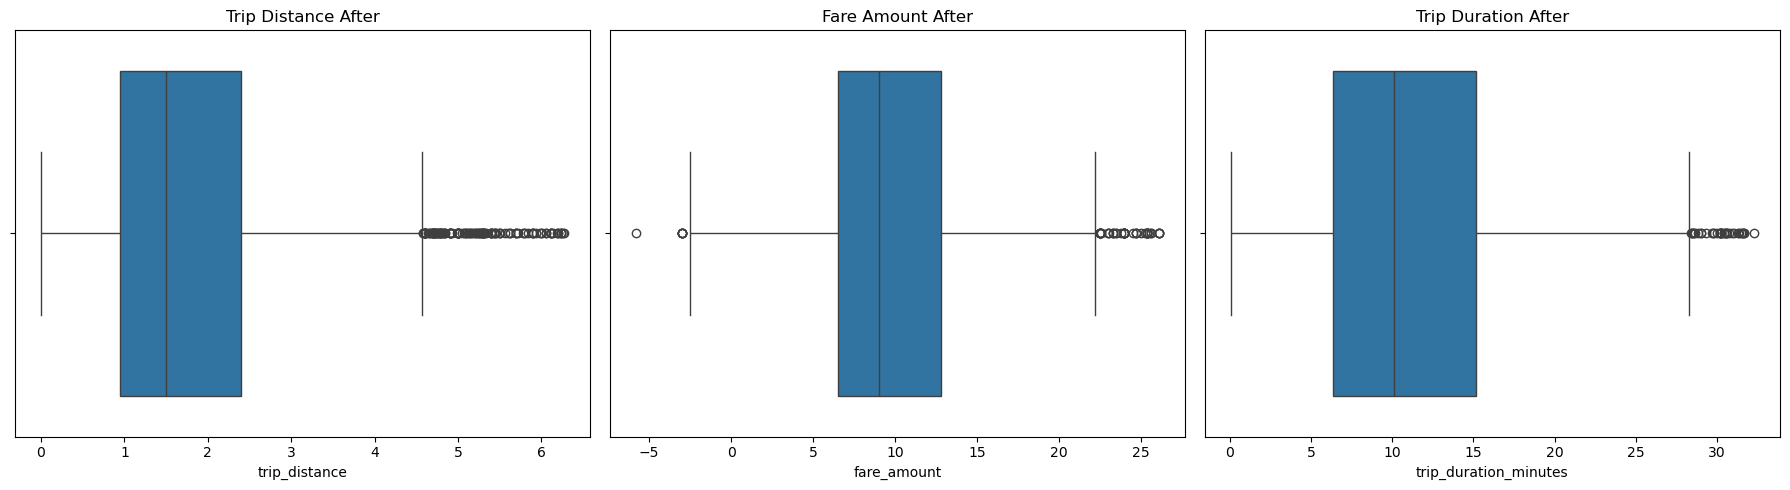

Successfully plotted before and after outlier removal!


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
spark = (SparkSession.builder 
    .appName("NYC Taxi EDA") 
    .master("local[*]") 
    .config("spark.hadoop.fs.defaultFS", "hdfs://namenode:9000") 
    .config("spark.driver.memory", "256g") 
    .getOrCreate()
)
df = df.withColumn(
    "trip_duration_minutes",
    (F.unix_timestamp("tpep_dropoff_datetime") - F.unix_timestamp("tpep_pickup_datetime")) / 60
)
original_df = df
spark.conf.set("spark.sql.execution.arrow.enabled", "true")  
sample_pdf_before = original_df.select("trip_distance", "fare_amount", "trip_duration_minutes")\
    .orderBy(F.rand()).limit(3000).toPandas()
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=sample_pdf_before['trip_distance'])
plt.title("Trip Distance Before")

plt.subplot(1, 3, 2)
sns.boxplot(x=sample_pdf_before['fare_amount'])
plt.title("Fare Amount Before")

plt.subplot(1, 3, 3)
sns.boxplot(x=sample_pdf_before['trip_duration_minutes'])
plt.title("Trip Duration Before")

plt.tight_layout()
plt.show()
def detect_outliers_all_columns(df, columns, threshold=3.5):
    for col in columns:
        median_val = df.approxQuantile(col, [0.5], 0.01)[0]

        mad_df = df.withColumn("mad_calc", F.abs(F.col(col) - F.lit(median_val)))
        mad_val = mad_df.approxQuantile("mad_calc", [0.5], 0.01)[0]

        # Avoid division by zero
        if mad_val == 0:
            mad_val = 1e-9

        df = df.withColumn(
            f"{col}_mod_z",
            0.6745 * (F.col(col) - F.lit(median_val)) / F.lit(mad_val)
        )
        df = df.filter(F.abs(F.col(f"{col}_mod_z")) <= threshold)
        df = df.drop(f"{col}_mod_z")  # Clean temp column after filtering

    return df
columns_to_clean = ["trip_distance", "fare_amount", "trip_duration_minutes"]
df = detect_outliers_all_columns(df, columns_to_clean)

sample_pdf_after = df.select("trip_distance", "fare_amount", "trip_duration_minutes")\
    .orderBy(F.rand()).limit(3000).toPandas()
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=sample_pdf_after['trip_distance'])
plt.title("Trip Distance After")

plt.subplot(1, 3, 2)
sns.boxplot(x=sample_pdf_after['fare_amount'])
plt.title("Fare Amount After")

plt.subplot(1, 3, 3)
sns.boxplot(x=sample_pdf_after['trip_duration_minutes'])
plt.title("Trip Duration After")

plt.tight_layout()
plt.show()

print("Successfully plotted before and after outlier removal!") 

In [8]:
df = df.filter(
    (F.col("trip_distance") > 0) &
    (F.col("fare_amount") > 0) &
    (F.col("trip_duration_minutes") > 0)
)
df = df.withColumn("trip_distance", F.when(F.col("trip_distance") > 100, 100).otherwise(F.col("trip_distance")))
df = df.withColumn("trip_duration_minutes", F.when(F.col("trip_duration_minutes") > 180, 180).otherwise(F.col("trip_duration_minutes")))
df = df.withColumn("pickup_hour", F.hour("tpep_pickup_datetime"))
df = df.withColumn("pickup_dayofweek", F.date_format("tpep_pickup_datetime", "u").cast("int"))  
df = df.withColumn("pickup_month", F.month("tpep_pickup_datetime"))
df = df.withColumn("pickup_year", F.year("tpep_pickup_datetime"))
valid_payment_types = [1, 2, 3, 4, 5, 6]
df = df.filter(F.col("payment_type").isin(valid_payment_types))

In [9]:
df = df.withColumn(
    "store_and_fwd_flag_encoded",
    F.when(F.col("store_and_fwd_flag") == "Y", 1).otherwise(0)
)

In [10]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler
assembler = VectorAssembler(inputCols=["trip_distance", "trip_duration_minutes"], outputCol="features_vector")
df_features = assembler.transform(df)
scaler = MinMaxScaler(inputCol="features_vector", outputCol="scaled_features")
scaler_model = scaler.fit(df_features)
df = scaler_model.transform(df_features)
df.select("trip_distance", "trip_duration_minutes", "scaled_features").show(5, truncate=False)

+-------------+---------------------+-----------------------------------------+
|trip_distance|trip_duration_minutes|scaled_features                          |
+-------------+---------------------+-----------------------------------------+
|1.5          |6.666666666666667    |[0.23726114649681526,0.20545829042224512]|
|2.6          |19.2                 |[0.4124203821656051,0.5926879505664263]  |
|1.3          |7.15                 |[0.20541401273885349,0.2203913491246138] |
|3.7          |13.633333333333333   |[0.5875796178343949,0.4207003089598352]  |
|2.1          |12.0                 |[0.3328025477707007,0.37023686920700305] |
+-------------+---------------------+-----------------------------------------+
only showing top 5 rows



In [11]:
pickup_avg_duration = df.groupBy("PULocationID").agg(F.mean("trip_duration_minutes").alias("avg_pickup_duration"))
dropoff_avg_duration = df.groupBy("DOLocationID").agg(F.mean("trip_duration_minutes").alias("avg_dropoff_duration"))
df = df.join(pickup_avg_duration, on="PULocationID", how="left")
df = df.join(dropoff_avg_duration, on="DOLocationID", how="left")

In [12]:
from pyspark.sql.functions import hour, dayofweek, month, avg
df = df.withColumn("pickup_hour", hour("tpep_pickup_datetime"))
df = df.withColumn("pickup_dayofweek", dayofweek("tpep_pickup_datetime"))  
df = df.withColumn("pickup_month", month("tpep_pickup_datetime"))
hourly_trend = df.groupBy("pickup_hour").agg(avg("trip_duration_minutes").alias("avg_trip_duration"))
hourly_trend = hourly_trend.orderBy("pickup_hour")
hourly_trend.show()
dayofweek_trend = df.groupBy("pickup_dayofweek").agg(avg("trip_duration_minutes").alias("avg_trip_duration"))
dayofweek_trend = dayofweek_trend.orderBy("pickup_dayofweek")
dayofweek_trend.show()
monthly_trend = df.groupBy("pickup_month").agg(avg("trip_duration_minutes").alias("avg_trip_duration"))
monthly_trend = monthly_trend.orderBy("pickup_month")
monthly_trend.show()

+-----------+------------------+
|pickup_hour| avg_trip_duration|
+-----------+------------------+
|          0| 10.34656232139397|
|          1|   9.8855893457727|
|          2| 9.587639113890445|
|          3| 9.346482291779447|
|          4| 8.963508199708569|
|          5| 7.679492006770252|
|          6| 8.102011613079634|
|          7|  9.80817095100493|
|          8|11.188728286378552|
|          9|11.530038934074442|
|         10|11.591033527645187|
|         11|11.853202074620704|
|         12|11.893362246484937|
|         13| 11.85371581499778|
|         14|  12.0364442524916|
|         15|12.121456470867729|
|         16|12.006043715137471|
|         17|12.086946142046548|
|         18| 11.73969789498506|
|         19|11.199893644451949|
+-----------+------------------+
only showing top 20 rows

+----------------+------------------+
|pickup_dayofweek| avg_trip_duration|
+----------------+------------------+
|               1|10.323486763401442|
|               2|10.798298273

In [13]:
location_group = df.groupBy("PULocationID", "DOLocationID")\
    .agg(F.avg("trip_duration_minutes").alias("avg_trip_duration"))\
    .orderBy(F.desc("avg_trip_duration"))
location_group.show(10, truncate=False)

+------------+------------+------------------+
|PULocationID|DOLocationID|avg_trip_duration |
+------------+------------+------------------+
|130         |260         |32.38333333333333 |
|210         |190         |32.36666666666667 |
|222         |181         |32.36666666666667 |
|20          |75          |32.35             |
|111         |225         |32.333333333333336|
|261         |124         |32.333333333333336|
|77          |34          |32.31666666666667 |
|76          |226         |32.31666666666667 |
|73          |157         |32.31666666666667 |
|188         |258         |32.3              |
+------------+------------+------------------+
only showing top 10 rows



In [14]:
df = df.filter((F.col("trip_duration_minutes") >= 1) & (F.col("trip_duration_minutes") <= 180))
print(f"Rows after removing trip time outliers: {df.count()}")

Rows after removing trip time outliers: 178864895


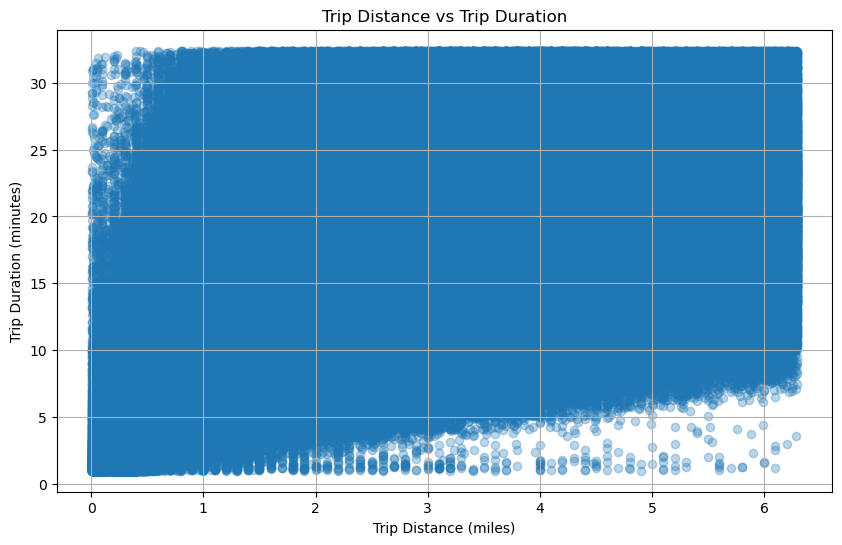

In [24]:
df = df.filter((F.col("trip_distance") <= 30) & (F.col("trip_duration_minutes") <= 180))
sample_df = df.select("trip_distance", "trip_duration_minutes").sample(fraction=0.05)
pdf = sample_df.toPandas()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(pdf['trip_distance'], pdf['trip_duration_minutes'], alpha=0.3)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Trip Duration (minutes)")
plt.title("Trip Distance vs Trip Duration")
plt.grid(True)
plt.show()

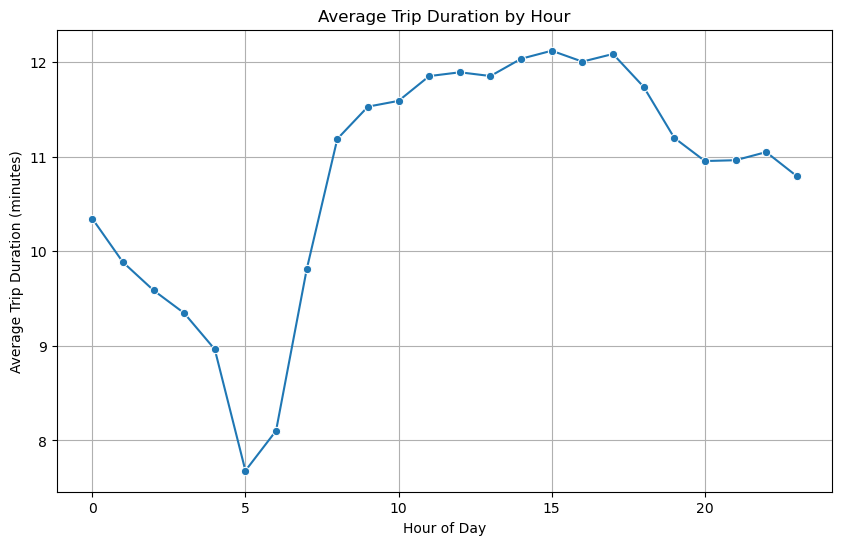

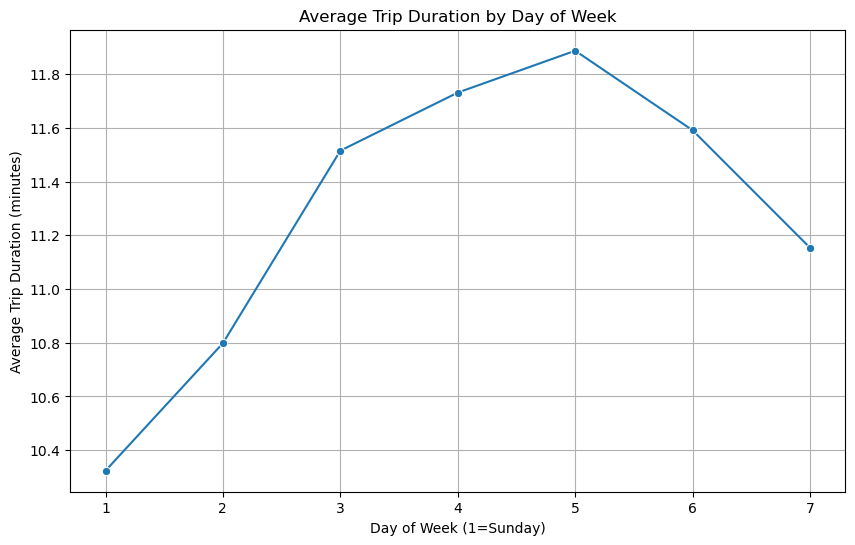

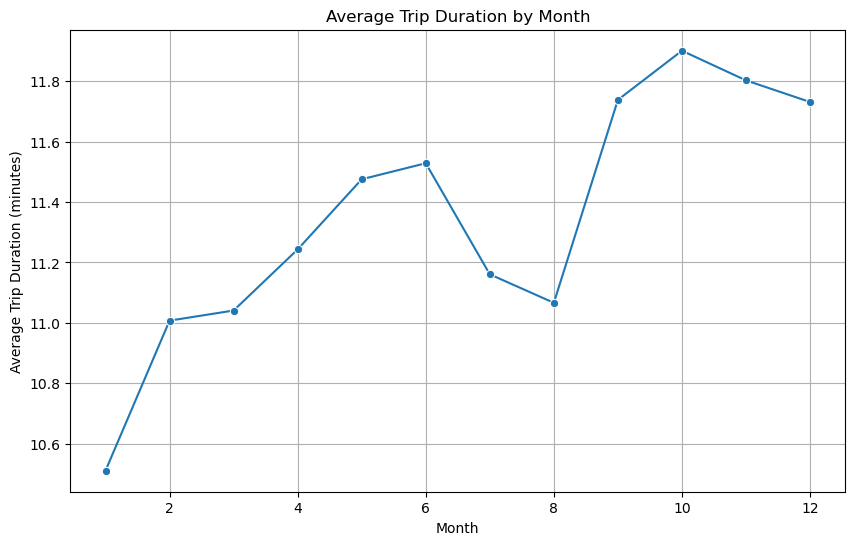

In [23]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "false")

hourly_trend_pd = hourly_trend.toPandas()
plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_trend_pd, x='pickup_hour', y='avg_trip_duration', marker='o')
plt.title("Average Trip Duration by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Duration (minutes)")
plt.grid(True)
plt.show()

dayofweek_trend_pd = dayofweek_trend.toPandas()
plt.figure(figsize=(10,6))
sns.lineplot(data=dayofweek_trend_pd, x='pickup_dayofweek', y='avg_trip_duration', marker='o')
plt.title("Average Trip Duration by Day of Week")
plt.xlabel("Day of Week (1=Sunday)")
plt.ylabel("Average Trip Duration (minutes)")
plt.grid(True)
plt.show()

monthly_trend_pd = monthly_trend.toPandas()
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_trend_pd, x='pickup_month', y='avg_trip_duration', marker='o')
plt.title("Average Trip Duration by Month")
plt.xlabel("Month")
plt.ylabel("Average Trip Duration (minutes)")
plt.grid(True)
plt.show()

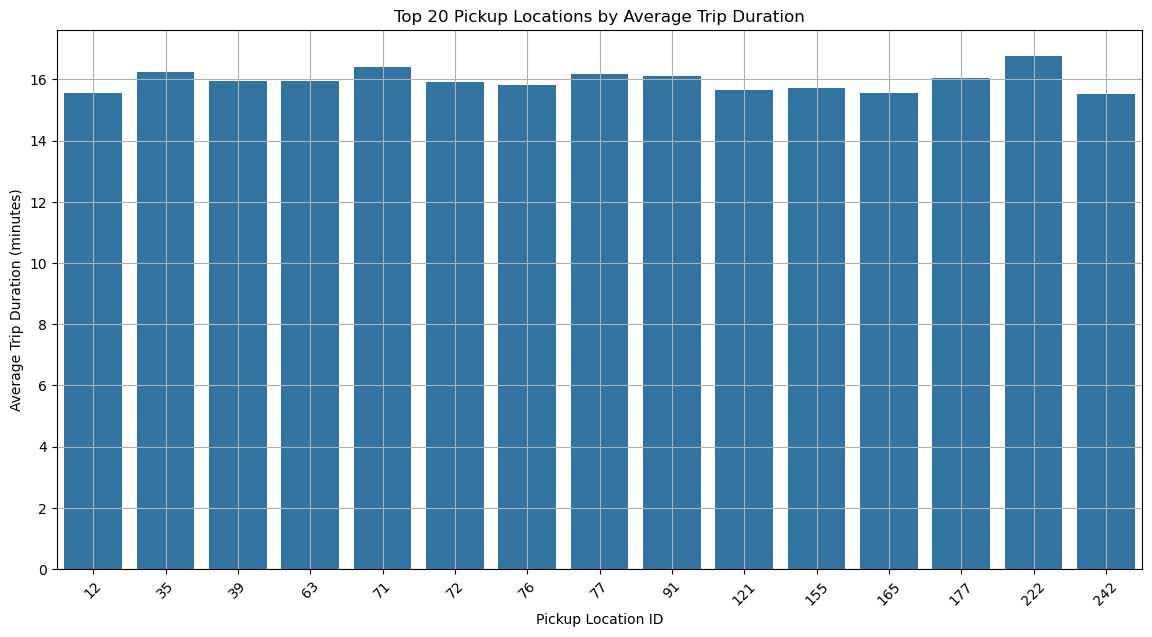

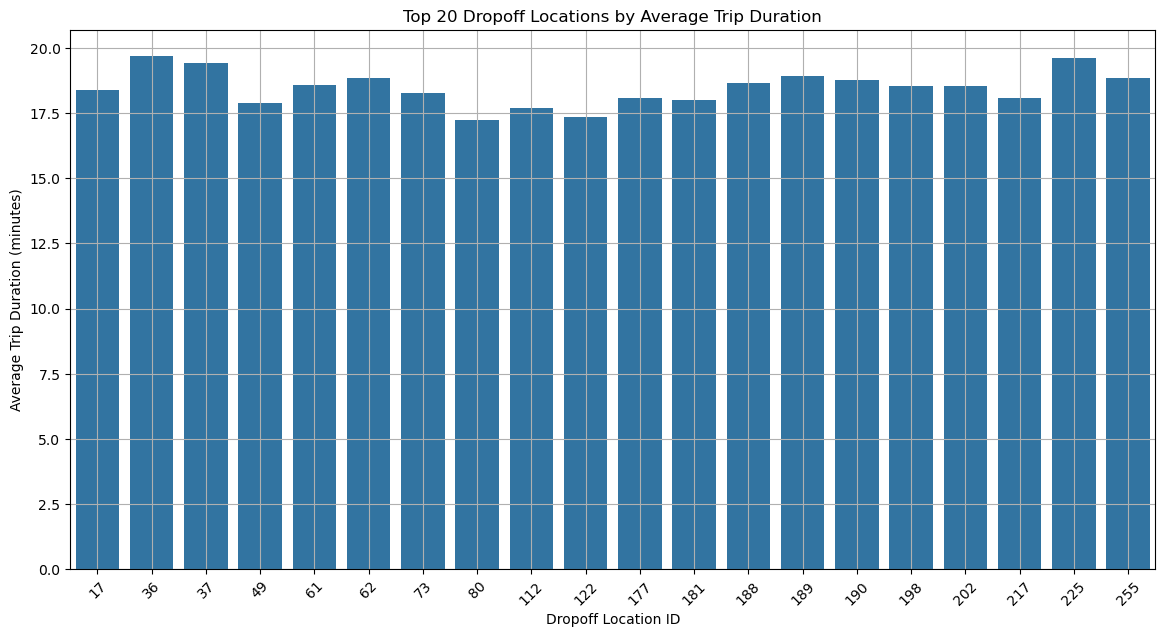

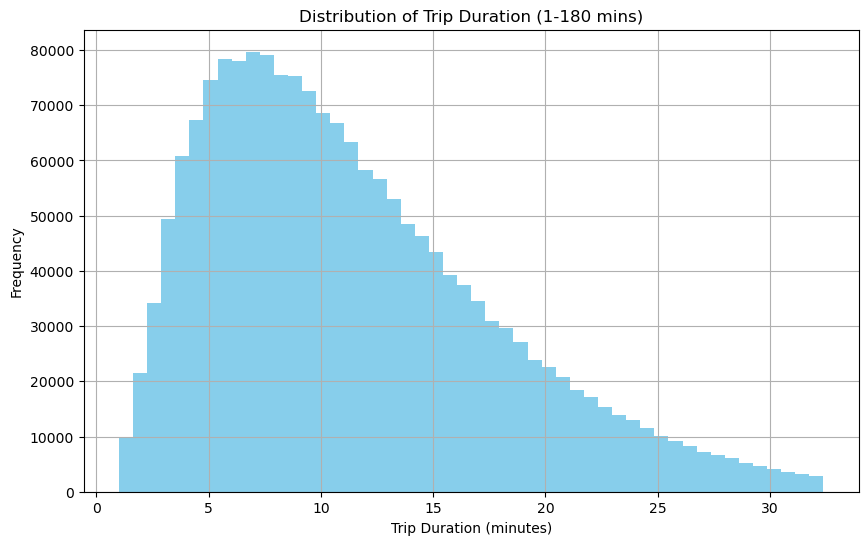

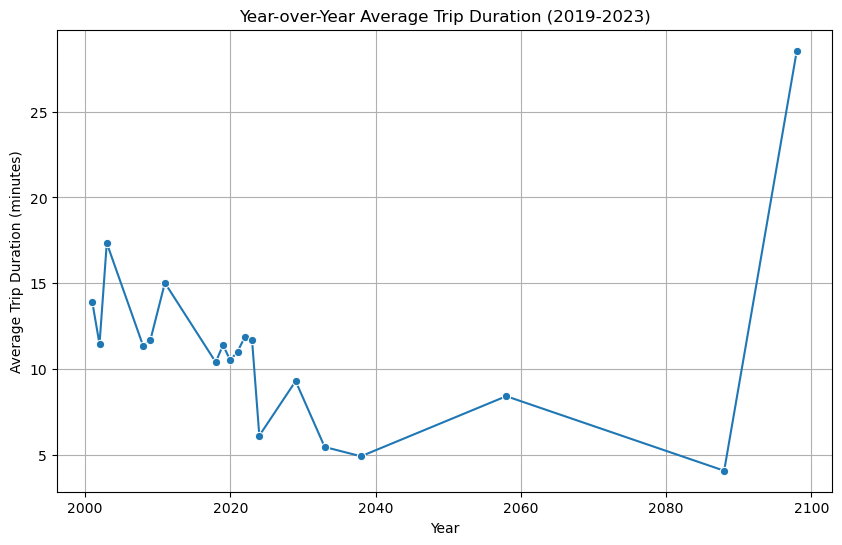

In [22]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
pickup_location_group = df.groupBy("PULocationID").agg(F.avg("trip_duration_minutes").alias("avg_pickup_duration"))
pickup_loc_pd = pickup_location_group.orderBy(F.desc("avg_pickup_duration")).limit(15).toPandas()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.barplot(data=pickup_loc_pd, x="PULocationID", y="avg_pickup_duration")
plt.title("Top 20 Pickup Locations by Average Trip Duration")
plt.xlabel("Pickup Location ID")
plt.ylabel("Average Trip Duration (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

dropoff_loc_pd = dropoff_avg_duration.orderBy(F.desc("avg_dropoff_duration")).limit(20).toPandas()

plt.figure(figsize=(14,7))
sns.barplot(data=dropoff_loc_pd, x="DOLocationID", y="avg_dropoff_duration")
plt.title("Top 20 Dropoff Locations by Average Trip Duration")
plt.xlabel("Dropoff Location ID")
plt.ylabel("Average Trip Duration (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

hist_data = df.select("trip_duration_minutes").sample(fraction=0.01).toPandas()

plt.figure(figsize=(10,6))
plt.hist(hist_data["trip_duration_minutes"], bins=50, color='skyblue')
plt.title("Distribution of Trip Duration (1-180 mins)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


from pyspark.sql.functions import year
df = df.withColumn("pickup_year", year("tpep_pickup_datetime"))

yearly_trend = df.groupBy("pickup_year").agg(F.avg("trip_duration_minutes").alias("avg_trip_duration"))
yearly_trend_pd = yearly_trend.orderBy("pickup_year").toPandas()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_trend_pd, x="pickup_year", y="avg_trip_duration", marker='o')
plt.title("Year-over-Year Average Trip Duration (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Average Trip Duration (minutes)")
plt.grid(True)
plt.show()


In [18]:
simple_df = df.drop("features_vector")

In [19]:
simple_df.write.mode("overwrite").parquet("file:///home/jovyan/work/processed_output_parquet")
print("Successfully saved Parquet inside mapped folder!")

✅ Successfully saved Parquet inside mapped folder!


In [1]:
from pyspark.sql import SparkSession
spark = (
    SparkSession.builder
    .appName("Safe Taxi ML")
    .master("local[*]")
    .config("spark.driver.memory", "16g")
    .config("spark.executor.memory", "8g")
    .config("spark.executor.cores", "2")
    .config("spark.sql.shuffle.partitions", "100")
    .config("spark.default.parallelism", "100")
    .config("spark.sql.parquet.enableVectorizedReader", "false") 
    .getOrCreate()
)
df = spark.read.parquet("hdfs://namenode:9000/user/raghu/")
df.printSchema()
df.show(5)

root
 |-- DOLocationID: long (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- pickup_hour: integer (nullable = true)
 |-- pickup_dayofweek: integer (nullable =

In [2]:
df = df.drop("scaled_features")

In [3]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col, when, hour, dayofweek, month
from pyspark.ml.feature import Imputer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StandardScaler
from pyspark.sql.functions import size
def encode_flag(val):
    if val == 'Y':
        return 1
    else:
        return 0

encode_udf = F.udf(encode_flag, IntegerType())
preprocessed_df = df.withColumn("store_and_fwd_flag_encoded", encode_udf(col("store_and_fwd_flag")))
preprocessed_df = preprocessed_df.withColumn("pickup_hour", hour(col("tpep_pickup_datetime")))
preprocessed_df = preprocessed_df.withColumn("pickup_dayofweek", dayofweek(col("tpep_pickup_datetime")))
preprocessed_df = preprocessed_df.withColumn("pickup_month", month(col("tpep_pickup_datetime")))
preprocessed_df = preprocessed_df.filter(
    (col("trip_distance") > 0) &
    (col("trip_distance") < 500) &
    (col("trip_duration_minutes") > 0) &
    (col("trip_duration_minutes") < 1440) &
    (col("passenger_count") > 0) &
    (col("fare_amount") >= 0)
)
if 'fare_amount' in preprocessed_df.columns and 'passenger_count' in preprocessed_df.columns:
    preprocessed_df = preprocessed_df.filter((col("fare_amount") >= 0) & (col("passenger_count") > 0))
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=[
        "trip_distance", "fare_amount", "passenger_count", "tip_amount",
        "tolls_amount", "improvement_surcharge", "total_amount",
        "congestion_surcharge", "airport_fee",
        "pickup_hour", "pickup_dayofweek", "pickup_month", "pickup_year",
        "trip_duration_minutes"
    ],
    outputCols=[
        "trip_distance_imputed", "fare_amount_imputed", "passenger_count_imputed", "tip_amount_imputed",
        "tolls_amount_imputed", "improvement_surcharge_imputed", "total_amount_imputed",
        "congestion_surcharge_imputed", "airport_fee_imputed",
        "pickup_hour_imputed", "pickup_dayofweek_imputed", "pickup_month_imputed", "pickup_year_imputed",
        "trip_duration_minutes_imputed"
    ]
)
imputed_df = imputer.fit(preprocessed_df).transform(preprocessed_df)
columns_to_drop = [
    "trip_distance", "fare_amount", "passenger_count", "tip_amount",
    "tolls_amount", "improvement_surcharge", "total_amount",
    "congestion_surcharge", "airport_fee",
    "pickup_hour", "pickup_dayofweek", "pickup_month", "pickup_year",
    "trip_duration_minutes"
]

imputed_df = imputed_df.drop(*columns_to_drop)
assembler = VectorAssembler(
    inputCols=[
        "trip_distance_imputed", "fare_amount_imputed", "passenger_count_imputed", "tip_amount_imputed",
        "tolls_amount_imputed", "improvement_surcharge_imputed", "total_amount_imputed",
        "congestion_surcharge_imputed", "airport_fee_imputed",
        "pickup_hour_imputed", "pickup_dayofweek_imputed", "pickup_month_imputed", "pickup_year_imputed",
        "trip_duration_minutes_imputed"
    ],
    outputCol="features"
)

assembled_df = assembler.transform(imputed_df)
scaler = StandardScaler(
    inputCol="features",
    outputCol="sc_feature",
    withMean=True,
    withStd=True
)

scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)
processed_df = scaled_df.select("sc_feature", "trip_duration_minutes_imputed")
processed_df.show(5, truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------+
|sc_feature                                                                                                                                                                                                                                                                              |trip_duration_minutes_imputed|
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------+
|[-0.7764219565233603,-0.5691221934140851,-0.4612409127997592

In [4]:
sampled_df = processed_df.limit(100000)
train_data, test_data = sampled_df.randomSplit([0.7, 0.3], seed=42)


In [5]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
lr = LinearRegression(
    featuresCol="sc_feature",
    labelCol="trip_duration_minutes_imputed",
    maxIter=50,
    regParam=0.3, 
    elasticNetParam=0.8  
)

lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)
evaluator_rmse = RegressionEvaluator(
    labelCol="trip_duration_minutes_imputed", 
    predictionCol="prediction", 
    metricName="rmse"
)
evaluator_mae = RegressionEvaluator(
    labelCol="trip_duration_minutes_imputed", 
    predictionCol="prediction", 
    metricName="mae"
)
evaluator_r2 = RegressionEvaluator(
    labelCol="trip_duration_minutes_imputed", 
    predictionCol="prediction", 
    metricName="r2"
)

rmse = evaluator_rmse.evaluate(lr_predictions)
mae = evaluator_mae.evaluate(lr_predictions)
r2 = evaluator_r2.evaluate(lr_predictions)

print(f"Linear Regression Evaluation Metrics:")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R2   : {r2:.4f}")


Linear Regression Evaluation Metrics:
RMSE : 0.3075
MAE  : 0.2454
R2   : 0.9978


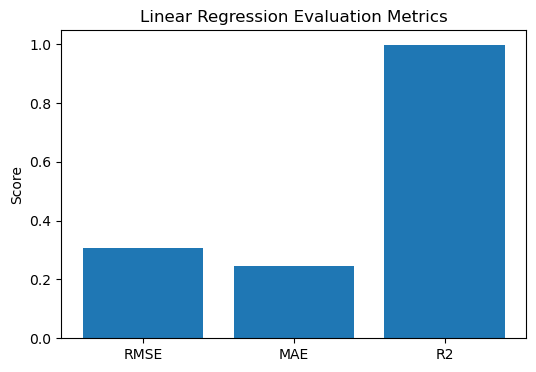

In [6]:
import matplotlib.pyplot as plt

# Linear Regression Metrics
metrics = ['RMSE', 'MAE', 'R2']
values = [rmse, mae, r2]

plt.figure(figsize=(6,4))
plt.bar(metrics, values)
plt.title('Linear Regression Evaluation Metrics')
plt.ylabel('Score')
plt.show()


In [12]:
from pyspark.sql.functions import when, col
percentile_value = processed_df.approxQuantile("trip_duration_minutes_imputed", [0.9], 0.01)[0]
processed_df = processed_df.withColumn(
    "delayed",
    when(col("trip_duration_minutes_imputed") > percentile_value, 1).otherwise(0)
)

In [13]:
final_df = processed_df.select(
    col("sc_feature").alias("features"),   
    "trip_duration_minutes_imputed",
    "delayed"
)

In [15]:
sample_df = final_df.limit(100000)
train_data, test_data = sample_df.randomSplit([0.7, 0.3], seed=42)

In [8]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    featuresCol="features",
    labelCol="delayed",
    maxDepth=5 
)

dt_model = dt.fit(train_data)
predictions = dt_model.transform(test_data)
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(
    labelCol="delayed",
    rawPredictionCol="rawPrediction",
    metricName="areaUnderROC"
)

auc = evaluator.evaluate(predictions)

print(f"Decision Tree Evaluation Metrics:")
print(f"AUC (Area Under ROC) : {auc:.4f}")

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

accuracy_evaluator = MulticlassClassificationEvaluator(
    labelCol="delayed",
    predictionCol="prediction",
    metricName="accuracy"
)

accuracy = accuracy_evaluator.evaluate(predictions)

print(f"Accuracy : {accuracy:.4f}")


Decision Tree Evaluation Metrics:
AUC (Area Under ROC) : 0.9988
Accuracy : 0.9870


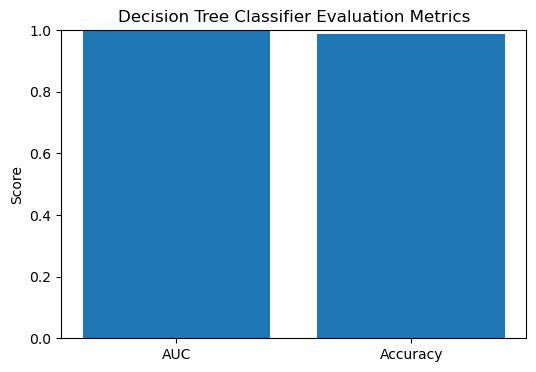

In [10]:
# Decision Tree Metrics
import matplotlib.pyplot as plt
classification_metrics = ['AUC', 'Accuracy']
classification_values = [auc, accuracy]

plt.figure(figsize=(6,4))
plt.bar(classification_metrics, classification_values)
plt.title('Decision Tree Classifier Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0,1)  
plt.show()


In [11]:
import matplotlib.pyplot as plt
from pyspark.ml.functions import vector_to_array
from pyspark.sql.functions import col
predictions = predictions.withColumn("probability_class1", vector_to_array("probability")[1])
# Collect to Pandas
y_score = predictions.select("probability_class1").rdd.flatMap(lambda x: x).collect()
y_true = predictions.select("delayed").rdd.flatMap(lambda x: x).collect()


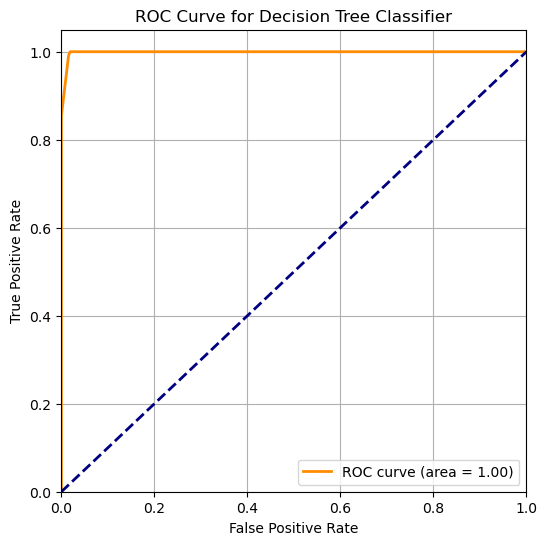

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [13]:
final_cluster_df = processed_df.select(
    col("sc_feature").alias("features")
)
sample_df = final_cluster_df.limit(100000)
from pyspark.ml.clustering import KMeans

kmeans = KMeans(featuresCol="features", k=5, seed=42)
kmeans_model = kmeans.fit(sample_df)
kmeans_predictions = kmeans_model.transform(sample_df)
kmeans_predictions.select("features", "prediction").show(10, truncate=False)
centers = kmeans_model.clusterCenters()

print("\nCluster Centers:")
for idx, center in enumerate(centers):
    print(f"Cluster {idx}: {center}")


+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+
|features                                                                                                                                                                                                                                                                                   |prediction|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+
|[-0.7764219565233603,-0.5691221934140851,-0.4612409127997592,-1.112489342965216,-0.03786022942814964,-0.4495

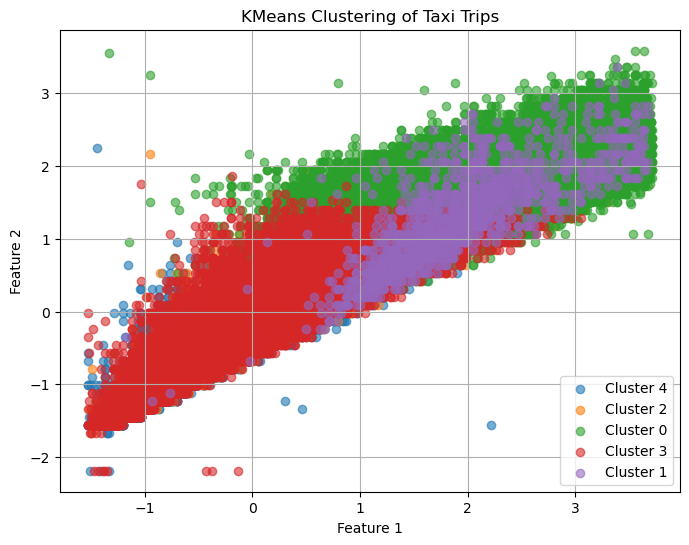

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plot_df = kmeans_predictions.select("features", "prediction").toPandas()
plot_df['features_array'] = plot_df['features'].apply(lambda v: np.array(v))
plot_df['x'] = plot_df['features_array'].apply(lambda v: v[0])  # 1st dimension
plot_df['y'] = plot_df['features_array'].apply(lambda v: v[1])  # 2nd dimension
plt.figure(figsize=(8,6))
for cluster_id in plot_df['prediction'].unique():
    subset = plot_df[plot_df['prediction'] == cluster_id]
    plt.scatter(subset['x'], subset['y'], label=f"Cluster {cluster_id}", alpha=0.6)

plt.title("KMeans Clustering of Taxi Trips")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml.evaluation import RegressionEvaluator
train_data = train_data.withColumnRenamed("sc_feature", "features")
test_data = test_data.withColumnRenamed("sc_feature", "features")

lr = LinearRegression(featuresCol="features", labelCol="trip_duration_minutes_imputed")
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.01])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .build())
evaluator = RegressionEvaluator(labelCol="trip_duration_minutes_imputed", metricName="rmse")
tvs = TrainValidationSplit(estimator=lr,
                            estimatorParamMaps=paramGrid,
                            evaluator=evaluator,
                            trainRatio=0.8)
lr_tuned_model = tvs.fit(train_data)
lr_predictions = lr_tuned_model.transform(test_data)


In [23]:
evaluator_rmse = RegressionEvaluator(labelCol="trip_duration_minutes_imputed", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="trip_duration_minutes_imputed", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="trip_duration_minutes_imputed", metricName="mae")

rmse = evaluator_rmse.evaluate(lr_predictions)
r2 = evaluator_r2.evaluate(lr_predictions)
mae = evaluator_mae.evaluate(lr_predictions)
print("Tuned Linear Regression Results:")
print(f"Best RMSE: {rmse:.4f}")
print(f"Best MAE : {mae:.4f}")
print(f"Best R2  : {r2:.4f}")
best_model_lr = lr_tuned_model.bestModel
print("Best regParam:", best_model_lr._java_obj.getRegParam())
print("Best elasticNetParam:", best_model_lr._java_obj.getElasticNetParam())


Tuned Linear Regression Results:
Best RMSE: 0.0099
Best MAE : 0.0081
Best R2  : 1.0000
Best regParam: 0.01
Best elasticNetParam: 1.0


In [16]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

dt = DecisionTreeClassifier(featuresCol="features", labelCol="delayed")
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [3, 5, 10])
             .addGrid(dt.minInstancesPerNode, [1, 5])
             .build())
evaluator = MulticlassClassificationEvaluator(labelCol="delayed", metricName="accuracy")

tvs = TrainValidationSplit(estimator=dt,
                            estimatorParamMaps=paramGrid,
                            evaluator=evaluator,
                            trainRatio=0.8)
dt_tuned_model = tvs.fit(train_data)
dt_predictions = dt_tuned_model.transform(test_data)

In [24]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator_acc = MulticlassClassificationEvaluator(labelCol="delayed", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_acc.evaluate(dt_predictions)
print("\n Tuned Decision Tree Classifier Results:")
print(f"Best Accuracy: {accuracy:.4f}")
best_model_dt = dt_tuned_model.bestModel
print(f"Best maxDepth: {best_model_dt._java_obj.getMaxDepth()}")
print(f"Best minInstancesPerNode: {best_model_dt._java_obj.getMinInstancesPerNode()}")


 Tuned Decision Tree Classifier Results:
Best Accuracy: 0.9878
Best maxDepth: 5
Best minInstancesPerNode: 1


In [7]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.tuning import ParamGridBuilder
cluster_df = processed_df.select("sc_feature").withColumnRenamed("sc_feature", "features")
small_cluster_df = cluster_df.limit(5000)
kmeans = KMeans(featuresCol="features")

paramGrid = (ParamGridBuilder()
             .addGrid(kmeans.k, [3, 5, 7])
             .build())

best_kmeans_model = None
lowest_wssse = float('inf')
for param in paramGrid:
    model = kmeans.copy(param).fit(small_cluster_df)  
    wssse = model.summary.trainingCost
    if wssse < lowest_wssse:
        lowest_wssse = wssse
        best_kmeans_model = model
kmeans_predictions = best_kmeans_model.transform(small_cluster_df)
print("\nCluster Centers:")
for center in best_kmeans_model.clusterCenters():
    print(center)



Cluster Centers:
[ 0.54030745  0.12491391  0.25148939 -0.32847765 -0.03786023 -0.44959523
 -0.44411432 -0.1797653   0.47084313 -1.51267552  0.01235306 -1.48842891
 -1.0235727  -0.08828057]
[ 2.51497629  1.94499523  0.08062097  0.86913887  0.29081316 -0.44959523
  1.40961752 -0.1797653   0.47084313  0.67168587 -0.04170525 -1.48842891
 -1.0235727   1.80433272]
[ 0.90941272  0.53442721  0.07492043 -0.05072472 -0.03786023 -0.44959523
  0.00532798 -0.1797653   0.47084313  0.90615834 -0.02153279 -1.48842891
 -1.0235727   0.47022052]
[-0.7085822  -0.83282822  0.0493106  -0.80997218 -0.03786023 -0.44959523
 -1.34860819 -0.1797653   0.47084313  0.00220079  0.00250315 -1.48842891
 -1.0235727  -0.77597515]
[ 2.18597544  1.47805573 -0.1023467  -0.05006414 -0.03786023 -0.44959523
  0.70480129 -0.1797653   0.47084313 -1.40708085  0.03238788 -1.48842891
 -1.0235727   1.10061547]
[ 2.08549064  1.60213543  0.06235877  0.35361361  0.06832435 -0.44959523
  0.9543016  -4.03723253  0.47084313 -0.07769062 

In [18]:
model_scores = {
    "Linear Regression (R²)": r2,   
    "Decision Tree (Accuracy)": accuracy, 
    "KMeans (WSSSE)": lowest_wssse     
}
best_model = None
best_score = None

for model, score in model_scores.items():
    if "KMeans" in model:
       
        if best_score is None or score < best_score:
            best_model = model
            best_score = score
    else:
       
        if best_score is None or score > best_score:
            best_model = model
            best_score = score


print("\n Model Evaluation Scores:")
for model, score in model_scores.items():
    print(f"{model}: {score:.4f}")

print(f"\n Best Model based on respective metrics: {best_model}")


 Model Evaluation Scores:
Linear Regression (R²): 1.0000
Decision Tree (Accuracy): 0.9878
KMeans (WSSSE): 32162.1328

 Best Model based on respective metrics: Linear Regression (R²)


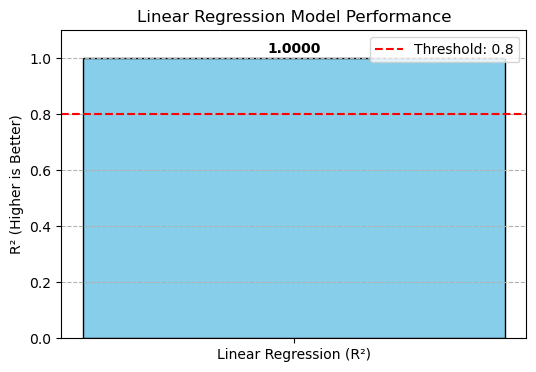

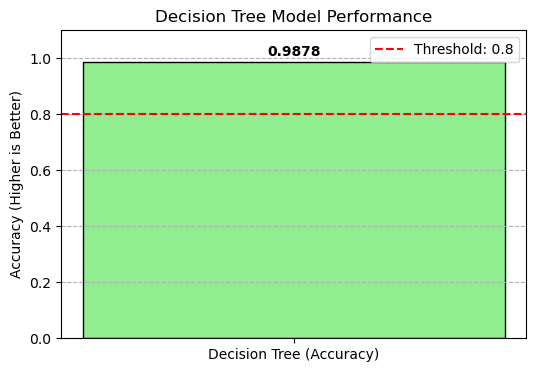

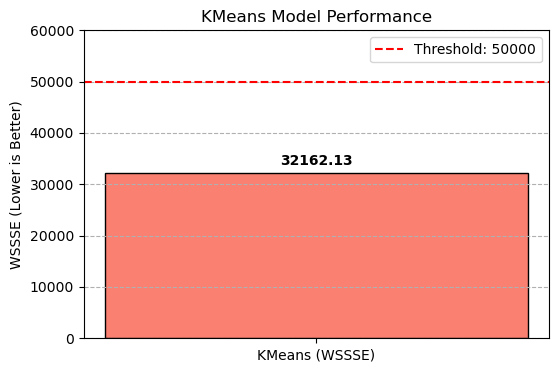


 Best Model based on Thresholds:
→ Linear Regression (Highest R² and above threshold)
 KMeans clustering is reasonably tight (WSSSE acceptable)


In [21]:
import matplotlib.pyplot as plt

r2_threshold = 0.8  
acc_threshold = 0.8 
wssse_threshold = 50000  

plt.figure(figsize=(6,4))
plt.bar(["Linear Regression (R²)"], [r2], color="skyblue", edgecolor='black')
plt.axhline(y=r2_threshold, color='red', linestyle='--', label=f"Threshold: {r2_threshold}")
plt.ylim(0, 1.1)
plt.title("Linear Regression Model Performance")
plt.ylabel("R² (Higher is Better)")
plt.text(0, r2 + 0.02, f"{r2:.4f}", ha='center', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()


plt.figure(figsize=(6,4))
plt.bar(["Decision Tree (Accuracy)"], [accuracy], color="lightgreen", edgecolor='black')
plt.axhline(y=acc_threshold, color='red', linestyle='--', label=f"Threshold: {acc_threshold}")
plt.ylim(0, 1.1)
plt.title("Decision Tree Model Performance")
plt.ylabel("Accuracy (Higher is Better)")
plt.text(0, accuracy + 0.02, f"{accuracy:.4f}", ha='center', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(6,4))
plt.bar(["KMeans (WSSSE)"], [lowest_wssse], color="salmon", edgecolor='black')
plt.axhline(y=wssse_threshold, color='red', linestyle='--', label=f"Threshold: {wssse_threshold}")
# Force y-limit above threshold to show dashed line clearly
plt.ylim(0, max(lowest_wssse, wssse_threshold) * 1.2)
plt.title("KMeans Model Performance")
plt.ylabel("WSSSE (Lower is Better)")
plt.text(0, lowest_wssse * 1.05, f"{lowest_wssse:.2f}", ha='center', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()


print("\n Best Model based on Thresholds:")

if (r2 >= r2_threshold) and (accuracy >= acc_threshold):
    if r2 >= accuracy:
        print("→ Linear Regression (Highest R² and above threshold)")
    else:
        print("→ Decision Tree (Highest Accuracy and above threshold)")
elif r2 >= r2_threshold:
    print("→ Linear Regression (Good R²)")
elif accuracy >= acc_threshold:
    print("→ Decision Tree (Good Accuracy)")
else:
    print("→ None fully meets threshold, reconsider model improvements.")

if lowest_wssse < wssse_threshold:
    print(" KMeans clustering is reasonably tight (WSSSE acceptable)")
else:
    print(" KMeans clustering quality is weak (High WSSSE)")



In [22]:
best_model_lr = lr_tuned_model.bestModel
best_model_dt = dt_tuned_model.bestModel
best_model_kmeans = best_kmeans_model

best_model_lr.write().overwrite().save("file:///home/jovyan/work/final_saved_models/lr_tuned_model")
print("\ Successfully saved Linear Regression Tuned Model!")

best_model_dt.write().overwrite().save("file:///home/jovyan/work/final_saved_models/dt_tuned_model")
print("\ Successfully saved Decision Tree Tuned Model!")

best_model_kmeans.write().overwrite().save("file:///home/jovyan/work/final_saved_models/kmeans_tuned_model")
print("\ Successfully saved KMeans Tuned Model!")


lr_predictions.write.mode("overwrite").parquet("file:///home/jovyan/work/final_saved_predictions/lr_predictions")
print("\ Successfully saved Linear Regression Predictions!")

dt_predictions.write.mode("overwrite").parquet("file:///home/jovyan/work/final_saved_predictions/dt_predictions")
print("\ Successfully saved Decision Tree Predictions!")

kmeans_predictions.write.mode("overwrite").parquet("file:///home/jovyan/work/final_saved_predictions/kmeans_predictions")
print("\ Successfully saved KMeans Predictions!")

from pyspark.sql import Row

metrics_data = [
    Row(model="Linear Regression", metric_name="RMSE", metric_value=float(rmse)),
    Row(model="Linear Regression", metric_name="MAE", metric_value=float(mae)),
    Row(model="Linear Regression", metric_name="R2", metric_value=float(r2)),
    Row(model="Decision Tree", metric_name="Accuracy", metric_value=float(accuracy)),
    Row(model="KMeans", metric_name="WSSSE", metric_value=float(lowest_wssse))
]

metrics_df = spark.createDataFrame(metrics_data)
metrics_df.write.mode("overwrite").parquet("file:///home/jovyan/work/final_saved_metrics/model_metrics")
print("\ Successfully saved Evaluation Metrics!")


\ Successfully saved Linear Regression Tuned Model!
\ Successfully saved Decision Tree Tuned Model!
\ Successfully saved KMeans Tuned Model!
\ Successfully saved Linear Regression Predictions!
\ Successfully saved Decision Tree Predictions!
\ Successfully saved KMeans Predictions!
\ Successfully saved Evaluation Metrics!
